In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
# Load the dataset
df = pd.read_excel("invoices - updated.xlsx")
df

,tax_number,invoice_number,issue_date,collection_type,invoice_sub_type,invoice_category,invoice_discount_amount,invoice_tax_amount,buyer_identification,buyer_name,days_overdue,expected_payment_amount
0,120985374,T7OPZRYKM,1708014393,CREDIT,EXPORT,GENERAL_SALES,0.00,106.23,NaN,NaN,0,649.84
1,748392615,2BFOJ03E5,1749262653,CASH,LOCAL,INCOME,0.00,135.67,NaN,NaN,12,1437.72
2,382915476,MD4FU4NP1,1642622798,CASH,LOCAL,INCOME,0.00,96.66,NaN,NaN,12,1216.49
3,382915476,V4IUP8311,1706758339,CREDIT,EXPORT,SPECIAL_SALES,0.00,81.02,NaN,NaN,0,1817.24
4,382915476,VURP4E9V3,1694894569,CREDIT,AREA_OF_DEVELOPMENT,INCOME,0.00,120.53,NaN,NaN,0,1244.63
...,...,...,...,...,...,...,...,...,...,...,...,...
532052,915673204,85NT4P8WG,1643075387,CREDIT,EXPORT,SPECIAL_SALES,329.48,67.91,NaN,NaN,0,755.23
532053,382915476,A7SD82SAY,1733610519,CASH,AREA_OF_DEVELOPMENT,INCOME,0.00,36.53,NaN,NaN,9,948.85
532054,340768291,FGE5CBRFE,1665131231,CASH,EXPORT,INCOME,2.45,34.29,NaN,NaN,18,687.83
532055,569827413,ZNAU9NXI3,1724409574,CASH,LOCAL,SPECIAL_SALES,711.04,0.00,382915476.0,Al Noor Supermarket,16,1289.79


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532057 entries, 0 to 532056
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tax_number               532057 non-null  int64  
 1   invoice_number           532057 non-null  object 
 2   issue_date               532057 non-null  int64  
 3   collection_type          532057 non-null  object 
 4   invoice_sub_type         532057 non-null  object 
 5   invoice_category         532057 non-null  object 
 6   invoice_discount_amount  532057 non-null  float64
 7   invoice_tax_amount       532057 non-null  float64
 8   buyer_identification     106349 non-null  float64
 9   buyer_name               106349 non-null  object 
 10  days_overdue             532057 non-null  int64  
 11  expected_payment_amount  532057 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 48.7+ MB


In [11]:
df.isna().sum()

tax_number                      0
invoice_number                  0
issue_date                      0
collection_type                 0
invoice_sub_type                0
invoice_category                0
invoice_discount_amount         0
invoice_tax_amount              0
buyer_identification       425708
buyer_name                 425708
days_overdue                    0
expected_payment_amount         0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [20]:
df.describe()

,tax_number,issue_date,invoice_discount_amount,invoice_tax_amount,buyer_identification,days_overdue,expected_payment_amount
count,5.320570e+05,5.320570e+05,532057.000000,532057.000000,1.063490e+05,532057.000000,532057.000000
mean,5.485875e+08,1.704060e+09,109.600338,111.087331,5.746772e+08,6.792669,1620.316440
std,2.541997e+08,3.645932e+07,477.190197,275.696583,2.644419e+08,15.641736,2928.275601
min,1.209854e+08,1.640984e+09,0.000000,0.000000,1.209854e+08,0.000000,23.310000
25%,3.829155e+08,1.672494e+09,0.000000,13.850000,3.829155e+08,0.000000,634.850000
50%,3.829155e+08,1.704138e+09,0.000000,54.120000,5.698274e+08,3.000000,1178.540000
75%,8.034156e+08,1.735581e+09,58.260000,137.270000,8.234610e+08,10.000000,2019.990000
max,9.582106e+08,1.767214e+09,46689.450000,15999.990000,9.582106e+08,510.000000,109175.910000


In [11]:
df["issue_date"] = pd.to_datetime(df["issue_date"], unit="s")

In [13]:
df.head()

,tax_number,invoice_number,issue_date,collection_type,invoice_sub_type,invoice_category,invoice_discount_amount,invoice_tax_amount,buyer_identification,buyer_name,days_overdue,expected_payment_amount
0,120985374,T7OPZRYKM,2024-02-15 16:26:33,CREDIT,EXPORT,GENERAL_SALES,0.0,106.23,NaN,NaN,0,649.84
1,748392615,2BFOJ03E5,2025-06-07 02:17:33,CASH,LOCAL,INCOME,0.0,135.67,NaN,NaN,12,1437.72
2,382915476,MD4FU4NP1,2022-01-19 20:06:38,CASH,LOCAL,INCOME,0.0,96.66,NaN,NaN,12,1216.49
3,382915476,V4IUP8311,2024-02-01 03:32:19,CREDIT,EXPORT,SPECIAL_SALES,0.0,81.02,NaN,NaN,0,1817.24
4,382915476,VURP4E9V3,2023-09-16 20:02:49,CREDIT,AREA_OF_DEVELOPMENT,INCOME,0.0,120.53,NaN,NaN,0,1244.63


In [26]:
df["invoice_sub_type"].value_counts()


invoice_sub_type
EXPORT                 177661
LOCAL                  177548
AREA_OF_DEVELOPMENT    176848
Name: count, dtype: int64

In [28]:
df["invoice_category"].value_counts()

invoice_category
GENERAL_SALES    178000
INCOME           177900
SPECIAL_SALES    176157
Name: count, dtype: int64

In [30]:
df["collection_type"].value_counts()

collection_type
CREDIT    319419
CASH      212638
Name: count, dtype: int64

In [32]:
df["collection_type"].value_counts(normalize=True) * 100

collection_type
CREDIT    60.034733
CASH      39.965267
Name: proportion, dtype: float64

In [34]:
ct = pd.crosstab(
    df["collection_type"],
    df["invoice_category"],
    margins=True
)
ct

invoice_category,GENERAL_SALES,INCOME,SPECIAL_SALES,All
collection_type,,,,
CASH,71115,88742,52781,212638
CREDIT,106885,89158,123376,319419
All,178000,177900,176157,532057


In [36]:
amount = df["expected_payment_amount"]

mean_val = amount.mean()
median_val = amount.median()
mode_val = amount.mode()[0]

mean_val, median_val, mode_val

(1620.316439967898, 1178.54, 378.38)

In [38]:
std = amount.std()
var = amount.var()
min_val = amount.min()
max_val = amount.max()
range_val = max_val - min_val
iqr = amount.quantile(0.75) - amount.quantile(0.25)

std, var, range_val, iqr

(2928.275600631338, 8574797.993252823, 109152.6, 1385.1399999999999)

In [40]:
q1 = amount.quantile(0.25)
q2 = amount.quantile(0.50)
q3 = amount.quantile(0.75)

p90 = amount.quantile(0.90)
p95 = amount.quantile(0.95)

q1, q2, q3, p90, p95

(634.85, 1178.54, 2019.99, 3262.7480000000005, 3972.6059999999966)

In [42]:
Q1 = amount.quantile(0.25)
Q3 = amount.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(amount < lower) | (amount > upper)]
outliers.shape

(22306, 12)

In [44]:
outliers[["invoice_number", "invoice_category", "expected_payment_amount"]].head()


,invoice_number,invoice_category,expected_payment_amount
50,0F3OOU7FI,INCOME,4835.23
51,LVPLI9X2S,INCOME,5048.06
84,316GU5HVD,INCOME,19146.01
158,9FLYM70G7,INCOME,4543.89
195,YJ9R1ZRXP,INCOME,4117.46


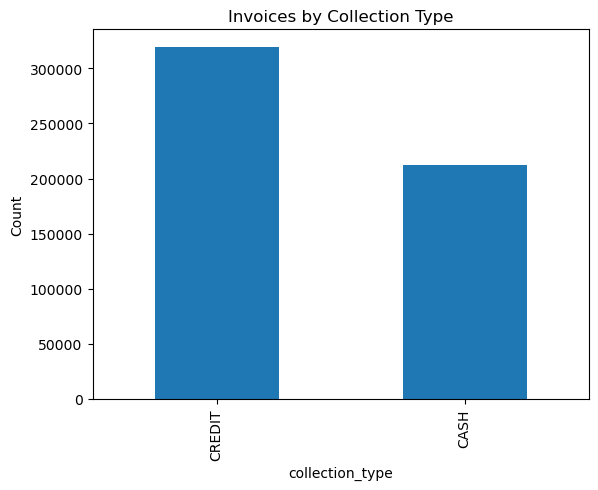

In [46]:
df["collection_type"].value_counts().plot(kind="bar")
plt.title("Invoices by Collection Type")
plt.ylabel("Count")
plt.show()

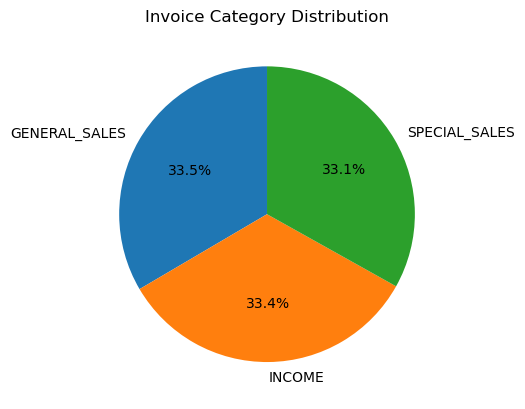

In [48]:
df["invoice_category"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", startangle=90
)
plt.ylabel("")
plt.title("Invoice Category Distribution")
plt.show()

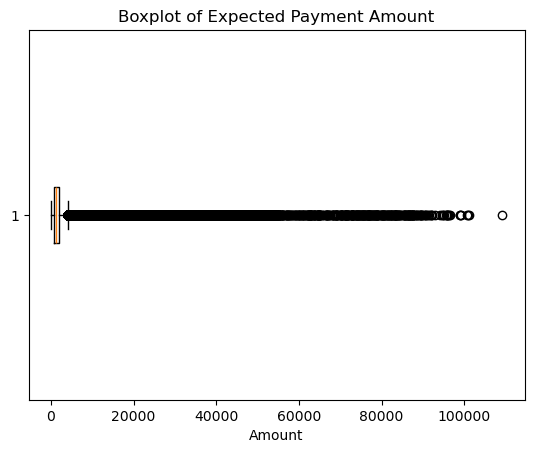

In [50]:
plt.boxplot(df['expected_payment_amount'], vert=False)
plt.title("Boxplot of Expected Payment Amount")
plt.xlabel("Amount")
plt.show()

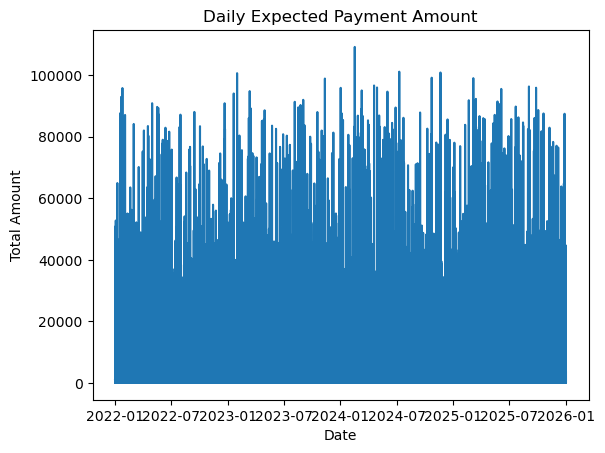

In [52]:
daily_total = df.groupby("issue_date")["expected_payment_amount"].sum()

plt.plot(daily_total.index, daily_total.values)
plt.title("Daily Expected Payment Amount")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.show()

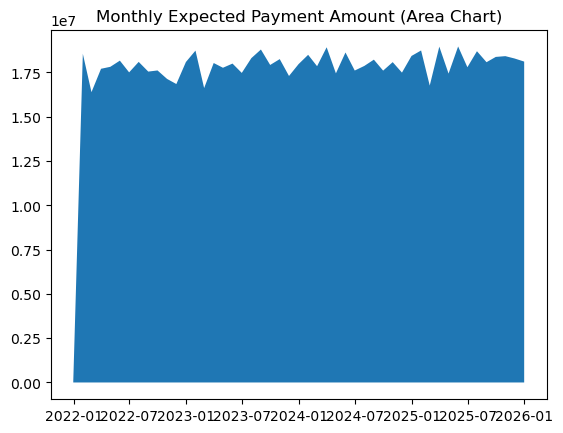

In [102]:
monthly = df.set_index("issue_date")["expected_payment_amount"].resample("ME").sum()

plt.fill_between(monthly.index, monthly.values)
plt.title("Monthly Expected Payment Amount (Area Chart)")
plt.show()

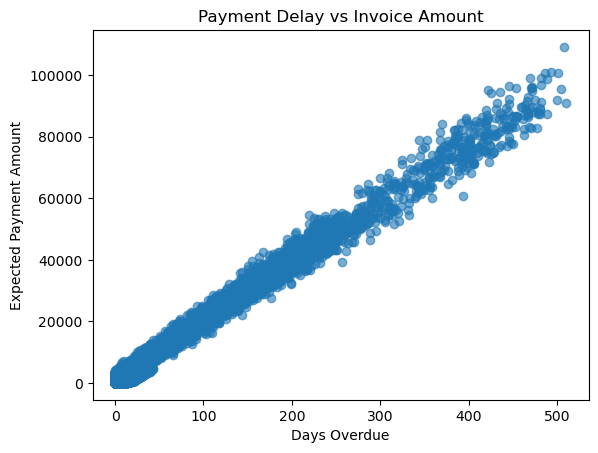

In [56]:
plt.scatter(df["days_overdue"], amount, alpha=0.6)
plt.xlabel("Days Overdue")
plt.ylabel("Expected Payment Amount")
plt.title("Payment Delay vs Invoice Amount")
plt.show()

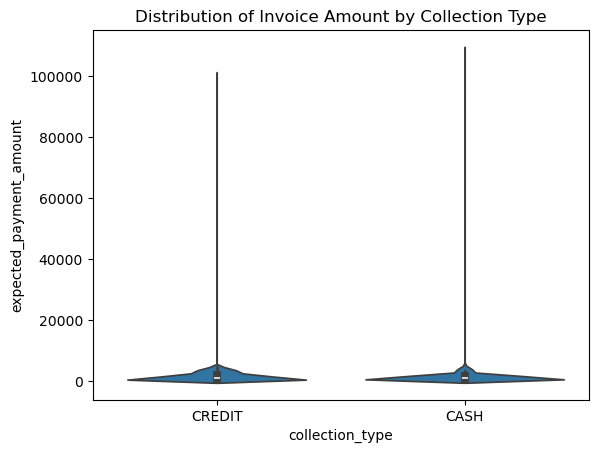

In [57]:
sns.violinplot(
    x="collection_type",
    y="expected_payment_amount",
    data=df
)
plt.title("Distribution of Invoice Amount by Collection Type")
plt.show()

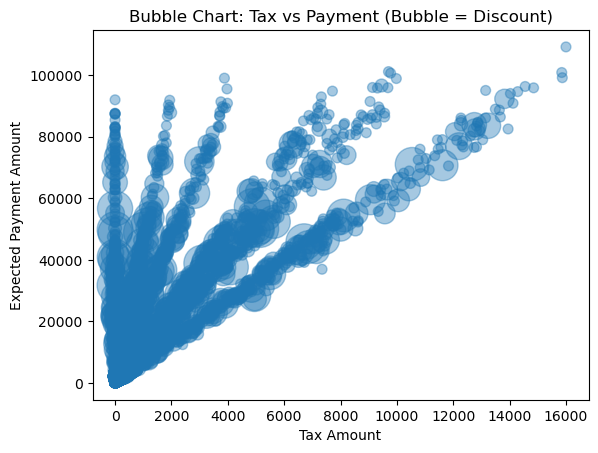

In [60]:
sizes = df["invoice_discount_amount"].fillna(0)
sizes = 50 + (sizes / sizes.max()) * 800

plt.scatter(
    df["invoice_tax_amount"],
    amount,
    s=sizes,
    alpha=0.4
)
plt.xlabel("Tax Amount")
plt.ylabel("Expected Payment Amount")
plt.title("Bubble Chart: Tax vs Payment (Bubble = Discount)")
plt.show()

# part 2

In [15]:
# Time features
df["year"] = df["issue_date"].dt.year
df["month"] = df["issue_date"].dt.month
df["day"] = df["issue_date"].dt.day
df["dayofweek"] = df["issue_date"].dt.dayofweek

target = "expected_payment_amount"

In [17]:
df_model = df.drop(columns=["tax_number","invoice_number","issue_date","buyer_identification", "buyer_name"])


In [19]:
# Separate X/y
X = df_model.drop(columns=[target])
y = df_model[target]

In [21]:
# Basic split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [72]:
scaler = StandardScaler()
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align columns (VERY IMPORTANT)
X_train_encoded, X_test_encoded = X_train_encoded.align(
    X_test_encoded, join="left", axis=1
)

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


In [90]:
#SelectFromModel 
from sklearn.feature_selection import SelectFromModel
model = LinearRegression()
model.fit(X_train_scaled , y_train)
sfm = SelectFromModel(model)
sfm.fit(X_train_scaled, y_train)
selected_features =  X_train_encoded.columns[sfm.get_support()]
print("Selected features:", selected_features)



Selected features: Index(['invoice_tax_amount', 'days_overdue', 'collection_type_CREDIT'], dtype='object')


In [94]:
X_train_selected1 = sfm.transform(X_train_encoded)
X_test_selected1 = sfm.transform(X_test_encoded)
model.fit(X_train_selected1, y_train)
y_pred = model.predict(X_test_selected1)

# Calculate the regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Regression Metrics:")
print("MAE:", round(mae, 3))
print("MSE:", round(mse, 3))
print("RMSE:", round(rmse, 3))
print("R²:", round(r2, 3))


Regression Metrics:
MAE: 490.729
MSE: 385593.472
RMSE: 620.962
R²: 0.954


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [62]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align columns (VERY IMPORTANT)
X_train_encoded, X_test_encoded = X_train_encoded.align(
    X_test_encoded, join="left", axis=1
)

# Fill missing values created by alignment
X_train_encoded = X_train_encoded.fillna(0)
X_test_encoded = X_test_encoded.fillna(0)

In [64]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [30]:
from sklearn.feature_selection import SelectKBest, f_regression

# instantiate the feature selection model
selector = SelectKBest(f_regression, k=3)

# fit the model on the training data
selector.fit(X_train_encoded, y_train)

# transform the training and testing sets to keep only the selected features
X_train_selected = selector.transform(X_train_encoded)
X_test_selected = selector.transform(X_test_encoded)

# train a linear regression model on the selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test_selected)

# calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# print the selected features and regression metrics
selected_features = X_train_encoded.columns[selector.get_support()]
print("Selected features:", selected_features)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

Selected features: Index(['invoice_discount_amount', 'invoice_tax_amount', 'days_overdue'], dtype='object')
MAE: 776.7778940171069
MSE: 1108727.9310558138
RMSE: 1052.961505020869
R2: 0.8675914051136927


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [143]:
# instantiate the feature selection model
selector = SelectKBest(f_regression, k=4)

# fit the model on the training data
selector.fit(X_train_encoded, y_train)

# transform the training and testing sets to keep only the selected features
X_train_selected = selector.transform(X_train_encoded)
X_test_selected = selector.transform(X_test_encoded)

# train a linear regression model on the selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test_selected)

# calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# print the selected features and regression metrics
selected_features = X_train_encoded.columns[selector.get_support()]
print("Selected features:", selected_features)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

Selected features: Index(['invoice_discount_amount', 'invoice_tax_amount', 'days_overdue',
       'invoice_sub_type_EXPORT'],
      dtype='object')
MAE: 699.7841227394621
MSE: 986351.4709783895
RMSE: 993.1522899225423
R2: 0.8822060771825939


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [145]:
# instantiate the feature selection model
selector = SelectKBest(f_regression, k=5)

# fit the model on the training data
selector.fit(X_train_encoded, y_train)

# transform the training and testing sets to keep only the selected features
X_train_selected = selector.transform(X_train_encoded)
X_test_selected = selector.transform(X_test_encoded)

# train a linear regression model on the selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test_selected)

# calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# print the selected features and regression metrics
selected_features = X_train_encoded.columns[selector.get_support()]
print("Selected features:", selected_features)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

Selected features: Index(['invoice_discount_amount', 'invoice_tax_amount', 'days_overdue',
       'invoice_sub_type_EXPORT', 'invoice_sub_type_LOCAL'],
      dtype='object')
MAE: 696.271702646573
MSE: 984039.4656167289
RMSE: 991.9876338023216
R2: 0.8824821858407528


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [147]:
# instantiate the feature selection model
selector = SelectKBest(f_regression, k=6)

# fit the model on the training data
selector.fit(X_train_encoded, y_train)

# transform the training and testing sets to keep only the selected features
X_train_selected = selector.transform(X_train_encoded)
X_test_selected = selector.transform(X_test_encoded)

# train a linear regression model on the selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test_selected)

# calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# print the selected features and regression metrics
selected_features = X_train_encoded.columns[selector.get_support()]
print("Selected features:", selected_features)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

Selected features: Index(['invoice_discount_amount', 'invoice_tax_amount', 'days_overdue',
       'collection_type_CREDIT', 'invoice_sub_type_EXPORT',
       'invoice_sub_type_LOCAL'],
      dtype='object')
MAE: 474.86536139460867
MSE: 369618.17338146747
RMSE: 607.9623124680242
R2: 0.9558587624510563


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [149]:
# instantiate the feature selection model
selector = SelectKBest(f_regression, k=7)

# fit the model on the training data
selector.fit(X_train_encoded, y_train)

# transform the training and testing sets to keep only the selected features
X_train_selected = selector.transform(X_train_encoded)
X_test_selected = selector.transform(X_test_encoded)

# train a linear regression model on the selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test_selected)

# calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# print the selected features and regression metrics
selected_features = X_train_encoded.columns[selector.get_support()]
print("Selected features:", selected_features)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

Selected features: Index(['invoice_discount_amount', 'invoice_tax_amount', 'days_overdue',
       'collection_type_CREDIT', 'invoice_sub_type_EXPORT',
       'invoice_sub_type_LOCAL', 'invoice_category_SPECIAL_SALES'],
      dtype='object')
MAE: 472.77629094275966
MSE: 367945.5374959841
RMSE: 606.5851444735389
R2: 0.9560585151236008


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [151]:
# instantiate the feature selection model
selector = SelectKBest(f_regression, k=8)

# fit the model on the training data
selector.fit(X_train_encoded, y_train)

# transform the training and testing sets to keep only the selected features
X_train_selected = selector.transform(X_train_encoded)
X_test_selected = selector.transform(X_test_encoded)

# train a linear regression model on the selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test_selected)

# calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# print the selected features and regression metrics
selected_features = X_train_encoded.columns[selector.get_support()]
print("Selected features:", selected_features)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

Selected features: Index(['invoice_discount_amount', 'invoice_tax_amount', 'days_overdue',
       'collection_type_CREDIT', 'invoice_sub_type_EXPORT',
       'invoice_sub_type_LOCAL', 'invoice_category_INCOME',
       'invoice_category_SPECIAL_SALES'],
      dtype='object')
MAE: 472.77629184153756
MSE: 367945.5304758587
RMSE: 606.5851386869437
R2: 0.9560585159619714


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [153]:
# instantiate the feature selection model
selector = SelectKBest(f_regression, k=9)

# fit the model on the training data
selector.fit(X_train_encoded, y_train)

# transform the training and testing sets to keep only the selected features
X_train_selected = selector.transform(X_train_encoded)
X_test_selected = selector.transform(X_test_encoded)

# train a linear regression model on the selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test_selected)

# calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# print the selected features and regression metrics
selected_features = X_train_encoded.columns[selector.get_support()]
print("Selected features:", selected_features)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

Selected features: Index(['invoice_discount_amount', 'invoice_tax_amount', 'days_overdue', 'year',
       'collection_type_CREDIT', 'invoice_sub_type_EXPORT',
       'invoice_sub_type_LOCAL', 'invoice_category_INCOME',
       'invoice_category_SPECIAL_SALES'],
      dtype='object')
MAE: 472.62320189792626
MSE: 367644.76758457883
RMSE: 606.3371731838473
R2: 0.9560944342343562


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
# instantiate the feature selection model
selector = SelectKBest(f_regression, k=12)

# fit the model on the training data
selector.fit(X_train_encoded, y_train)

# transform the training and testing sets to keep only the selected features
X_train_selected = selector.transform(X_train_encoded)
X_test_selected = selector.transform(X_test_encoded)

# train a linear regression model on the selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test_selected)

# calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# print the selected features and regression metrics
selected_features = X_train_encoded.columns[selector.get_support()]
print("Selected features:", selected_features)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

Selected features: Index(['invoice_discount_amount', 'invoice_tax_amount', 'days_overdue', 'year',
       'month', 'day', 'dayofweek', 'collection_type_CREDIT',
       'invoice_sub_type_EXPORT', 'invoice_sub_type_LOCAL',
       'invoice_category_INCOME', 'invoice_category_SPECIAL_SALES'],
      dtype='object')
MAE: 468.8885802001359
MSE: 361058.2372918893
RMSE: 600.881217289981
R2: 0.9568810232584107


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [104]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train_selected1, y_train)
# make predictions on the testing set
y_pred = model.predict(X_test_selected1)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False)) 
print( 'R2:', r2_score(y_test, y_pred))

MAE: 320.95001642041484
MSE: 217984.65191157468
RMSE: 466.8882649109685
R2: 0.9739674264010767


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [108]:
import tensorflow as tf
# Build the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train_selected.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Single output for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [110]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [112]:
# Train the model
history = model.fit(X_train_selected1, y_train, validation_data=(X_test_selected1, y_test), epochs=50, batch_size=64,callbacks=[early_stop],
    verbose=1)

Epoch 1/50
6651/6651 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 1757634.6250 - mae: 668.0073 - val_loss: 575771.4375 - val_mae: 568.6285
Epoch 2/50
6651/6651 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 432523.2812 - mae: 488.8616 - val_loss: 343303.0000 - val_mae: 448.2342
Epoch 3/50
6651/6651 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 315749.9688 - mae: 423.6765 - val_loss: 279699.0312 - val_mae: 394.6519
Epoch 4/50
6651/6651 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 261604.6875 - mae: 374.3489 - val_loss: 233820.1562 - val_mae: 360.9642
Epoch 5/50
6651/6651 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 239120.1406 - mae: 358.2477 - val_loss: 557792.8750 - val_mae: 414.2505
Epoch 6/50
6651/6651 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 230761.9062 - mae: 348.5306 - val_loss: 224674.9531 - val_mae: 341.8910
Epoch 7/50
6651/6651 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 226311.5000 - mae: 343.9835 - val_loss: 235071.5156 - val_mae: 349.2466
Epoch 8/50
6651/6651 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step

In [114]:
# Evaluate the model
from sklearn.metrics import r2_score

loss, mae = model.evaluate(X_test_selected, y_test)
print(f"Mean Absolute Error on Test Data: {mae}")

predictions = model.predict(X_test_selected)
# Calculate R-squared score
r2 = r2_score(y_test, predictions)
print(f"R-squared Score on Test Data: {r2}")

3326/3326 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 180475.2031 - mae: 321.4573
Mean Absolute Error on Test Data: 321.4573059082031
3326/3326 ━━━━━━━━━━━━━━━━━━━━ 3s 824us/step
R-squared Score on Test Data: 0.9784469644093785


In [116]:
X_train_selected1.shape

(425645, 3)

Scenario recap (the example)

The company must process 5,000 invoices across:

Amman (A) cost = 0.90 JD per invoice, max 3,000

Irbid (I) cost = 0.60 JD per invoice

Aqaba (Q) cost = 0.30 JD per invoice + 10% rework also at 0.30 JD
→ effective Aqaba cost = 
0.30
+
0.30
×
0.10
=
0.33
0.30+0.30×0.10=0.33 JD per invoice

Objective (minimize cost):

Min Cost
=
0.90
𝐴
+
0.60
𝐼
+
0.33
𝑄
Min Cost=0.90A+0.60I+0.33Q

Constraints:

𝐴
+
𝐼
+
𝑄
=
5000
A+I+Q=5000

𝐴
≤
3000
A≤3000

1.1
𝑄
≤
2000
1.1Q≤2000 (Aqaba including rework)

𝐴
+
𝐼
≥
2000
A+I≥2000 (high-accuracy minimum 40%)

In [56]:
import numpy as np
from scipy.optimize import linprog

# Minimize: 0.90A + 0.60I + 0.33Q
c = np.array([0.90, 0.60, 0.33])

# Equality: A + I + Q = 5000
A_eq = np.array([[1, 1, 1]])
b_eq = np.array([5000])

# Inequalities (Ax <= b)
# 1) A <= 3000
# 2) 1.1Q <= 2000  => [0,0,1.1] <= 2000
# 3) A + I >= 2000 => -(A+I) <= -2000
A_ub = np.array([
    [1, 0, 0],
    [0, 0, 1.1],
    [-1, -1, 0]
])
b_ub = np.array([3000, 2000, -2000])

bounds = [(0, None), (0, None), (0, None)]

res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method="highs")

print("LP success:", res.success)
print("A, I, Q:", res.x)
print("Min cost:", res.fun)

LP success: True
A, I, Q: [   0.         3181.81818182 1818.18181818]
Min cost: 2509.090909090909


In [118]:
TOTAL = 5000
A_MAX = 3000
Q_MAX = int(2000 / 1.1)   # 1818 if Aqaba limit includes rework
HIGH_ACC_MIN = int(0.40 * TOTAL)  # 2000

def cost(A, I, Q):
    return 0.90*A + 0.60*I + 0.33*Q

def repair(A, Q):
    # clamp A and Q
    A = int(np.clip(A, 0, A_MAX))
    Q = int(np.clip(Q, 0, Q_MAX))

    # ensure A + Q <= TOTAL so I >= 0
    if A + Q > TOTAL:
        Q = TOTAL - A

    I = TOTAL - A - Q

    # ensure high-accuracy: A+I >= 2000
    # But A+I = TOTAL - Q, so this becomes: TOTAL - Q >= 2000 => Q <= 3000
    # Our Q is already <= 1818, so always satisfied. 
    if (A + I) < HIGH_ACC_MIN:
        # decrease Q to increase (A+I)
        needed = HIGH_ACC_MIN - (A + I)
        Q = max(0, Q - needed)
        I = TOTAL - A - Q

    return A, I, Q

def fitness(A, Q):
    A, I, Q = repair(A, Q)
    return cost(A, I, Q)

# GA parameters
pop_size = 60
gens = 120
mutation_rate = 0.25
elite_k = 10

# init population: random (A, Q)
pop = [(np.random.randint(0, A_MAX+1), np.random.randint(0, Q_MAX+1)) for _ in range(pop_size)]
best_cost_per_generation = []

for g in range(gens):
    pop = sorted(pop, key=lambda x: fitness(x[0], x[1]))
    elites = pop[:elite_k]

    # record convergence
    bestA_gen, bestQ_gen = pop[0]
    bestA_gen, bestI_gen, bestQ_gen = repair(bestA_gen, bestQ_gen)
    best_cost_per_generation.append(
        cost(bestA_gen, bestI_gen, bestQ_gen)
    )
    # make children
    children = []
    while len(children) < pop_size - elite_k:
        p1 = elites[np.random.randint(0, elite_k)]
        p2 = elites[np.random.randint(0, elite_k)]

        # crossover
        childA = p1[0] if np.random.rand() < 0.5 else p2[0]
        childQ = p1[1] if np.random.rand() < 0.5 else p2[1]

        # mutation
        if np.random.rand() < mutation_rate:
            childA += np.random.randint(-200, 201)
        if np.random.rand() < mutation_rate:
            childQ += np.random.randint(-200, 201)

        children.append((childA, childQ))

    pop = elites + children

bestA, bestQ = sorted(pop, key=lambda x: fitness(x[0], x[1]))[0]
bestA, bestI, bestQ = repair(bestA, bestQ)

print("GA best solution:")
print("A:", bestA, "I:", bestI, "Q:", bestQ)
print("Total processed in Aqaba (incl rework):", 1.1*bestQ)
print("Min cost:", cost(bestA, bestI, bestQ))

GA best solution:
A: 0 I: 3182 Q: 1818
Total processed in Aqaba (incl rework): 1999.8000000000002
Min cost: 2509.14


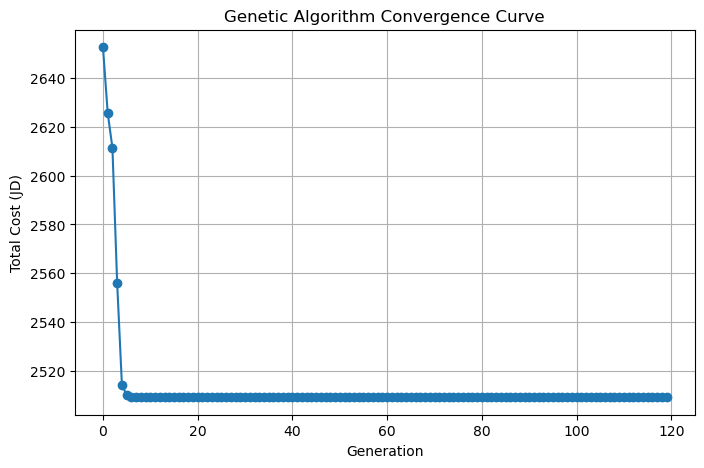

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(best_cost_per_generation, marker='o')
plt.xlabel("Generation")
plt.ylabel("Total Cost (JD)")
plt.title("Genetic Algorithm Convergence Curve")
plt.grid(True)
plt.show()

#  time series 


In [125]:
df["issue_date"] = pd.to_datetime(df["issue_date"])

monthly = (
    df.set_index("issue_date")["expected_payment_amount"]
    .resample("ME")
    .sum()
).resample("ME").sum()

In [127]:
window = 3
monthly_sma = monthly.rolling(window=window).mean()

# Forecast next month
sma_forecast = monthly_sma.iloc[-1]

print("SMA Forecast for next month:", sma_forecast)

SMA Forecast for next month: 18276426.246666666


In [129]:
span = 3
monthly_ema = monthly.ewm(span=span, adjust=False).mean()

# Forecast next month
ema_forecast = monthly_ema.iloc[-1]

print("EMA Forecast for next month:", ema_forecast)

EMA Forecast for next month: 18222329.820850886


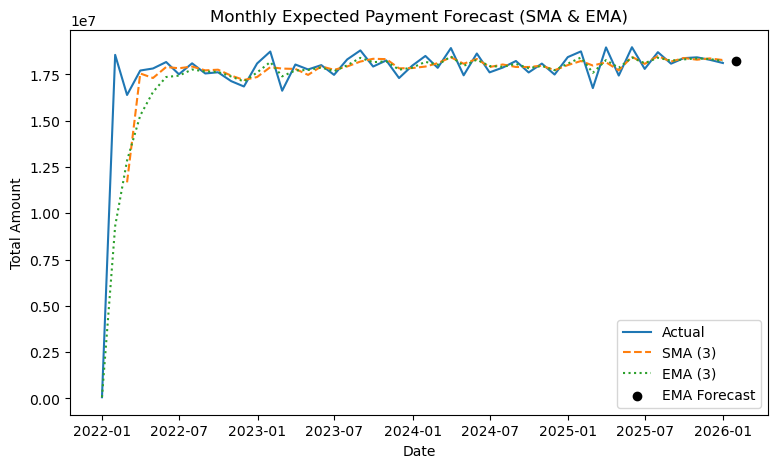

In [131]:
plt.figure(figsize=(9,5))
plt.plot(monthly, label="Actual")
plt.plot(monthly_sma, label="SMA (3)", linestyle="--")
plt.plot(monthly_ema, label="EMA (3)", linestyle=":")

# Plot forecast point
plt.scatter(
    monthly.index[-1] + pd.offsets.MonthEnd(1),
    ema_forecast,
    color="black",
    label="EMA Forecast"
)

plt.title("Monthly Expected Payment Forecast (SMA & EMA)")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.legend()
plt.show()